In [45]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date,timedelta
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns
import pandas_ta as ta
import numpy as np

In [46]:
today = date.today()

d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [47]:
ticker = input('Write ticker: ')
stock_data = yf.download(ticker, start = start_date, end = end_date, progress=False)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-15,154.649994,155.240005,151.380005,152.369995,150.700256,90481100
2022-09-16,151.210007,151.350006,148.369995,150.699997,149.048569,162278800
2022-09-19,149.309998,154.559998,149.100006,154.479996,152.787140,81474200
2022-09-20,153.399994,158.080002,153.080002,156.899994,155.180618,107689800
2022-09-21,157.339996,158.740005,153.600006,153.720001,152.035492,101696800
...,...,...,...,...,...,...
2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100


In [48]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-09-15 to 2024-09-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [49]:
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]


In [50]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-15,154.649994,155.240005,151.380005,152.369995,150.700256,90481100
2022-09-16,151.210007,151.350006,148.369995,150.699997,149.048569,162278800
2022-09-19,149.309998,154.559998,149.100006,154.479996,152.787140,81474200
2022-09-20,153.399994,158.080002,153.080002,156.899994,155.180618,107689800
2022-09-21,157.339996,158.740005,153.600006,153.720001,152.035492,101696800


In [51]:
fig = px.line(data_frame = stock_data, x=stock_data.index, y='Close', title= 'Stock market line plot')
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [52]:
figure = go.Figure(data=[go.Candlestick(x=stock_data.index, open=stock_data['Open'], high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'])])
title = 'CandleStick of stock market'
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

In [53]:
#RSI, Garman, ATR, MACD
stock_data['RSI'] = ta.rsi(close = stock_data["Adj Close"], length=14)

stock_data['Garman'] = ((np.log(stock_data['High'])- np.log(stock_data['Low']))**2)/2-(2*np.log(2)-1)*((np.log(stock_data['Adj Close']) -np.log(stock_data['Open']))**2)

def compute_atr(stock_data):
    atr = ta.atr(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())
stock_data['ATR'] = compute_atr(stock_data)

def compute_macd(stock_data):
    macd = ta.macd(close=stock_data['Close'], length = 14).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
stock_data['MACD'] = compute_macd(stock_data)

today = date.today() 
two_weeks = today - timedelta(days=14)

#Last 14 days
technical_analysis = stock_data.iloc[-14:]
technical_analysis



,Open,High,Low,Close,Adj Close,Volume,RSI,Garman,ATR,MACD
Date,,,,,,,,,,
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200,61.118197,0.000112,1.270060,0.443287
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600,62.325177,0.000121,1.198920,0.494383
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200,58.765911,0.000153,1.150333,0.482802
2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300,63.567296,0.000152,1.283901,0.553596
2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,61.714643,0.000071,1.129179,0.577127
2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50190600,49.469884,0.000352,1.375441,0.415728
2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200,46.413526,0.000186,1.402397,0.228246
2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400,49.111619,0.000153,1.375012,0.116091
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000,46.538658,0.000226,1.416293,-0.019624


In [54]:
#MA
stock_data['M10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['M20'] = stock_data['Close'].rolling(window=20).mean()

#Bolinger Bands
stock_data['SD'] = stock_data['Close'].rolling(window=20).std()
# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
stock_data['UB'] = stock_data['M20'] + 2 * stock_data['SD']
stock_data['LB'] = stock_data['M20'] - 2 * stock_data['SD']


In [55]:
fig = go.Figure()

# Add the price chart (default)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price'))

# Add the RSI chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['RSI'], mode='lines', name='RSI', visible=False))

# Add the MACD chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MACD'], mode='lines', name='MACD', visible=False))

# Add the Bollinger Bands chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['UB'], mode='lines', name='Upper Bollinger Band', visible=False, line=dict(color='red')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['LB'], fill='tonexty', mode='lines', name='Lower Bollinger Band', visible=False, line=dict(color='green')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['M20'], mode='lines', name='Middle Bollinger Band', visible=False, line=dict(color='blue')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price (Bollinger)', visible=False, line=dict(color='black')))

# Define the buttons for dropdown menu
buttons = [
    dict(label='Price', method='update', args=[{'visible': [True, False, False, False, False, False, False]}, {'title': 'Stock market line plot in USD'}]),
    dict(label='RSI', method='update', args=[{'visible': [False, True, False, False, False, False, False]}, {'title': 'RSI Indicator'}]),
    dict(label='MACD', method='update', args=[{'visible': [False, False, True, False, False, False, False]}, {'title': 'MACD Indicator'}]),
    dict(label='Bollinger Bands', method='update', args=[{'visible': [False, False, False, True, True, True, True]}, {'title': 'Bollinger Bands'}])
]

# Create the dropdown menu
dropdown = go.layout.Updatemenu(
    buttons=buttons,
    direction='down',
    showactive=True,
    xanchor='left',
    yanchor='top',
    x=0.1,
    y=1.1
)

# Update layout to include dropdown menu and other customizations
fig.update_layout(
    updatemenus=[dropdown],
    plot_bgcolor='lightgray',   # Background color of the plotting area
    font=dict(family='Arial', size=12),
    title_font=dict(size=20),
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Count',
    hoverlabel=dict(bgcolor='lightgrey', font_size=14),
    margin=dict(l=100, r=100, t=100, b=100),
    showlegend=True
)

# Show the figure
fig.show()


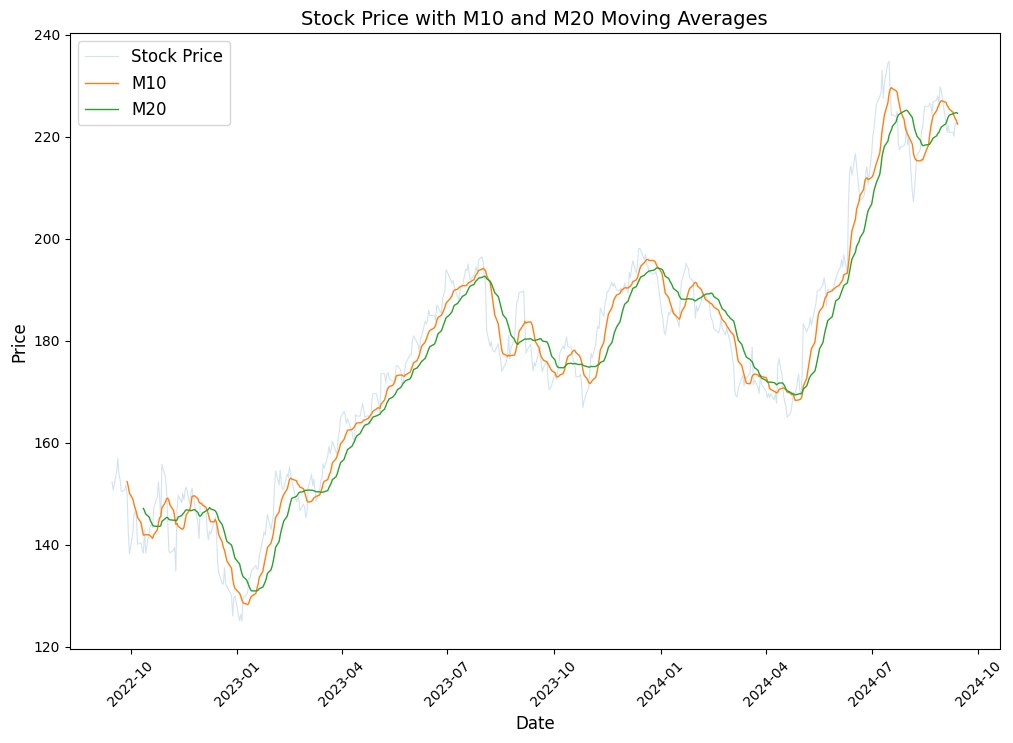

In [56]:
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', linewidth=0.8, alpha=0.2)

plt.plot(stock_data.index, stock_data['M10'], label='M10', linewidth=1, alpha=1)
plt.plot(stock_data.index, stock_data['M20'], label='M20', linewidth=1, alpha=1)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Stock Price with M10 and M20 Moving Averages', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

Machine Learning Models

In [57]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

In [58]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'Garman',
       'ATR', 'MACD', 'M10', 'M20', 'SD', 'UB', 'LB'],
      dtype='object')

In [59]:
X = stock_data[['Open', 'High', 'Low', 'Volume']].to_numpy()
y = stock_data['Close'].to_numpy()

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [60]:
model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()     

/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         3,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,931 (792.70 KB)

 Trainable params: 202,931 (792.70 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=30)

Epoch 1/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 16351.8164 - val_loss: 105.8652
Epoch 2/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 82.8114 - val_loss: 76.9130
Epoch 3/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 51.9940 - val_loss: 55.1496
Epoch 4/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.9531 - val_loss: 34.5178
Epoch 5/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.8218 - val_loss: 32.9173
Epoch 6/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18.7030 - val_loss: 29.3576
Epoch 7/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 14.5572 - val_loss: 13.1360
Epoch 8/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.2135 - val_loss: 11.0146
Epoch 9/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5943 - val_loss: 9.3025
Epoch 10/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2589 - val_loss: 8.3898
Epoch 11/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3590 - val_loss: 6.4599
Epoch 12/30
401/401 ━━━━━━━━━━━━

<Axes: >

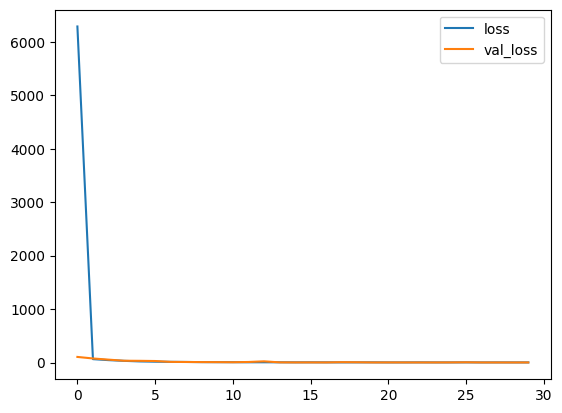

In [62]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [63]:
features = stock_data[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)
features_scaled = scaler.transform(features)
features_scaled = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# Making a prediction
prediction = model.predict(features_scaled)
print(prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
[[223.92963]]


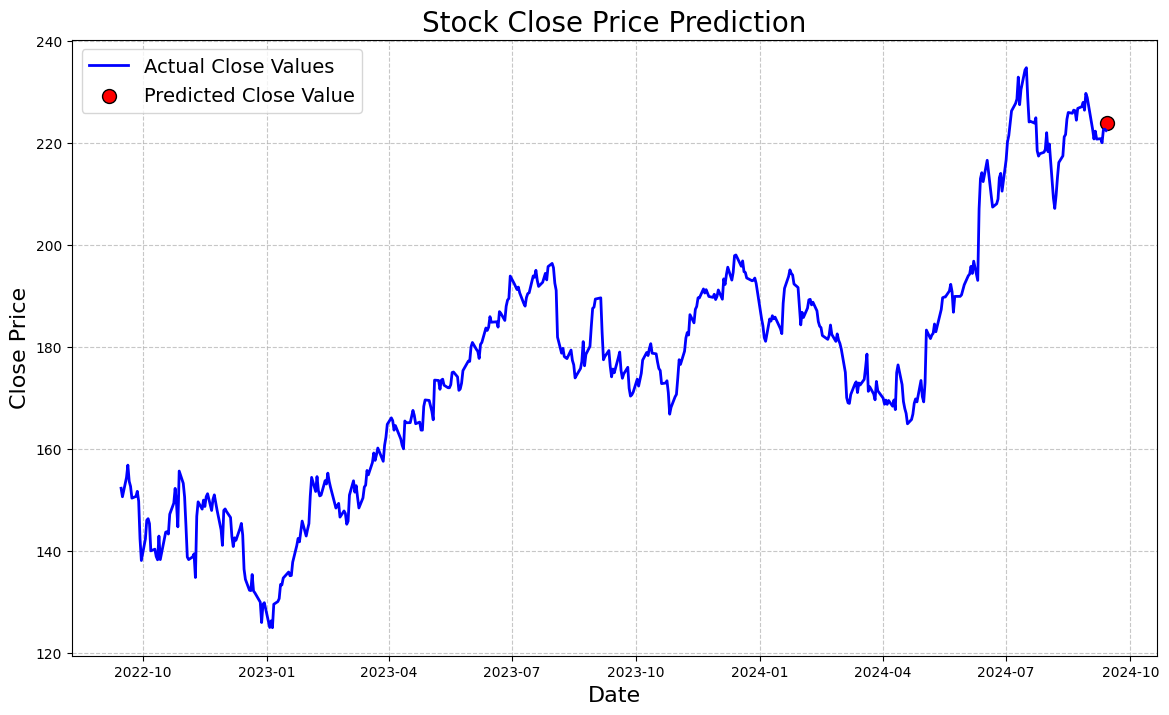

In [64]:
plt.figure(figsize=(14, 8))

# Plotting the actual close values
plt.plot(stock_data.index, stock_data['Close'], label='Actual Close Values', color='blue', linewidth=2)

# Plotting the predicted value
plt.scatter(stock_data.index[-1] + pd.DateOffset(1), prediction, color='red', label='Predicted Close Value', s=100, edgecolors='black')

# Adding grid lines for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Adding titles and labels with larger font sizes
plt.title('Stock Close Price Prediction', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)

# Adding a legend with a larger font size
plt.legend(fontsize=14)

# Display the plot
plt.show()

In [65]:
forecast_data = stock_data.reset_index().rename(columns={"Date": "ds", "Close": "y"})


In [66]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=720)
predictions = model.predict(forecasts)
fig_forecast = plot_plotly(model, predictions)
fig_forecast.update_layout(title='Stock Price Forecast', xaxis_title='Date', yaxis_title='Price')
fig_forecast.show()


19:43:45 - cmdstanpy - INFO - Chain [1] start processing
19:43:45 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

predicted_prices = forecast[['ds', 'yhat']].tail(400)

print(predicted_prices)

19:43:45 - cmdstanpy - INFO - Chain [1] start processing
19:43:46 - cmdstanpy - INFO - Chain [1] done processing


            ds        yhat
132 2023-03-27  159.869862
133 2023-03-28  159.854757
134 2023-03-29  159.848360
135 2023-03-30  159.988413
136 2023-03-31  160.849334
..         ...         ...
527 2024-10-09  246.544191
528 2024-10-10  246.799267
529 2024-10-11  247.775212
530 2024-10-12  249.610124
531 2024-10-13  250.012018

[400 rows x 2 columns]


In [68]:
model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

predicted_prices = forecast[['ds', 'yhat']].tail(700)

trace1 = go.Scatter(x=forecast_data['ds'], y=forecast_data['y'], mode='lines+markers', name='Historical Data', marker=dict(color='blue'))

trace2 = go.Scatter(x=predicted_prices['ds'], y=predicted_prices['yhat'], mode='lines+markers', name='Predicted Prices', marker=dict(color='red'))

layout = go.Layout(
    title='Historical and Predicted Prices for BTC-USD',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    legend=dict(x=0.7, y=1),
    hovermode='closest'
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

19:43:46 - cmdstanpy - INFO - Chain [1] start processing
19:43:46 - cmdstanpy - INFO - Chain [1] done processing
